# Logstic Regression course

In [2]:
import random

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from matplotlib.animation import FuncAnimation
from sklearn.datasets import fetch_openml

dataset = fetch_openml(name='boston', version=1, as_frame=True, return_X_y=False, parser='pandas')

In [3]:
data = dataset['data']
target = dataset['target']
columns = dataset['feature_names']

dataframe = pd.DataFrame(data)
dataframe.columns = columns
dataframe['price'] = target

rm = dataframe['RM']
lstat = dataframe['LSTAT']
price = dataframe['price']

In [4]:
print(np.percentile(price, 66))
greater_then_most = np.percentile(price, 66)

23.53


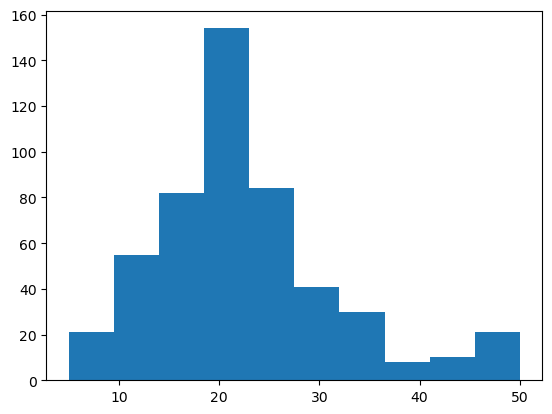

In [5]:
plt.hist(price)
plt.show()

In [6]:
dataframe['expensive'] = dataframe['price'].apply(lambda p: int(p > greater_then_most))
expensive = dataframe['expensive']

# print(dataframe.head())
print(dataframe['expensive'])

0      1
1      0
2      1
3      1
4      1
      ..
501    0
502    0
503    1
504    0
505    0
Name: expensive, Length: 506, dtype: int64


In [7]:
def logistic(x):
    return 1 / (1 + np.exp(-x))

def model(x, w, b):
    return logistic(np.dot(x, w.T) + b)

def loss(yhat, y):
    return -np.sum(y * np.log(yhat) + (1 - y) * np.log(1 - yhat))

def partial_w(x, y, yhat):
    return np.array([np.sum((yhat - y) * x[0]), np.sum((yhat - y) * x[1])])

def partial_b(x, y, yhat):
    return np.sum((yhat - y))

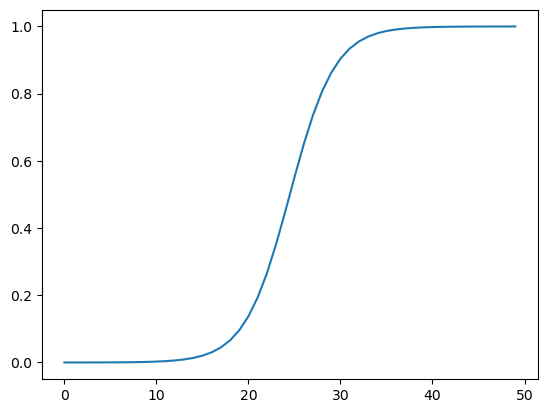

In [8]:
import matplotlib.pyplot as plt
plt.plot(logistic(np.linspace(-10, 10)))
plt.show()

In [9]:
w = np.random.random_sample((1, 2))
b = 0

In [10]:
learning_rate = 1e-5
epoch = 200
losses = []

history_k_b_loss = []

for i in range(epoch):
    batch_loss = []
    for batch in range(len(rm)):
        index = random.choice(range(len(rm)))

        x = np.array([rm[index], lstat[index]])
        y = expensive[index]

        yhat = model(x, w, b)
        loss_v = loss(yhat, y)

        w = w + -1 * partial_w(x, y, yhat) * learning_rate
        b = b + -1 * partial_b(x, y, yhat) * learning_rate

        batch_loss.append(loss_v)
        history_k_b_loss.append((w, b, loss_v))

        if batch % 100 == 0:
            print('Epoch: {}, Batch: {}, loss:{}'.format(i, batch, loss_v))
    losses.append(np.mean(batch_loss))

Epoch: 0, Batch: 0, loss:25.83680728474424
Epoch: 0, Batch: 100, loss:1.5376429244563745e-05
Epoch: 0, Batch: 200, loss:0.004823684927920508
Epoch: 0, Batch: 300, loss:14.311562364160443
Epoch: 0, Batch: 400, loss:13.236412045648624
Epoch: 0, Batch: 500, loss:0.00031005831030210404
Epoch: 1, Batch: 0, loss:0.0010358492525237104
Epoch: 1, Batch: 100, loss:0.0028871473712829285
Epoch: 1, Batch: 200, loss:12.246540906248779
Epoch: 1, Batch: 300, loss:0.0005256046330900688
Epoch: 1, Batch: 400, loss:16.02920049247515
Epoch: 1, Batch: 500, loss:9.297712941680311
Epoch: 2, Batch: 0, loss:7.811223798659116
Epoch: 2, Batch: 100, loss:10.39934493730911
Epoch: 2, Batch: 200, loss:11.005556141085268
Epoch: 2, Batch: 300, loss:12.508497871860373
Epoch: 2, Batch: 400, loss:11.130702264239638
Epoch: 2, Batch: 500, loss:0.009557710886463287
Epoch: 3, Batch: 0, loss:18.780174115438953
Epoch: 3, Batch: 100, loss:13.799004770629733
Epoch: 3, Batch: 200, loss:0.000522578616769875
Epoch: 3, Batch: 300, lo

In [11]:
random_test_indices = np.random.choice(range(len(rm)), size=100)
decision_boundary = 0.5

for i in random_test_indices:
    x1, x2, y = rm[i], lstat[i], expensive[i]
    predicate = model(np.array([x1, x2]), w, b)
    predicate_label = int(predicate > decision_boundary)

    print('RM:{}, LSTAT:{}, EXPENSIVE:{}, Predicated:{}'.format(x1, x2, y, predicate_label))

RM:6.595, LSTAT:4.32, EXPENSIVE:1, Predicated:1
RM:6.968, LSTAT:17.21, EXPENSIVE:0, Predicated:0
RM:8.266, LSTAT:4.14, EXPENSIVE:1, Predicated:1
RM:5.531, LSTAT:27.38, EXPENSIVE:0, Predicated:0
RM:6.63, LSTAT:4.7, EXPENSIVE:1, Predicated:1
RM:5.093, LSTAT:29.68, EXPENSIVE:0, Predicated:0
RM:5.155, LSTAT:20.08, EXPENSIVE:0, Predicated:0
RM:6.98, LSTAT:11.66, EXPENSIVE:1, Predicated:0
RM:6.069, LSTAT:9.55, EXPENSIVE:0, Predicated:0
RM:6.333, LSTAT:7.34, EXPENSIVE:0, Predicated:1
RM:6.395, LSTAT:13.27, EXPENSIVE:0, Predicated:0
RM:6.144, LSTAT:9.45, EXPENSIVE:1, Predicated:0
RM:5.888, LSTAT:14.8, EXPENSIVE:0, Predicated:0
RM:6.631, LSTAT:9.54, EXPENSIVE:1, Predicated:0
RM:5.39, LSTAT:20.85, EXPENSIVE:0, Predicated:0
RM:5.57, LSTAT:21.02, EXPENSIVE:0, Predicated:0
RM:4.97, LSTAT:3.26, EXPENSIVE:1, Predicated:1
RM:4.368, LSTAT:30.63, EXPENSIVE:0, Predicated:0
RM:4.926, LSTAT:29.53, EXPENSIVE:0, Predicated:0
RM:6.762, LSTAT:9.5, EXPENSIVE:1, Predicated:0
RM:5.707, LSTAT:12.01, EXPENSIVE:0, P

/var/folders/h4/7cr1cmpn7v5b3x20_9wz8m740000gn/T/ipykernel_18549/1902039918.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicate_label = int(predicate > decision_boundary)


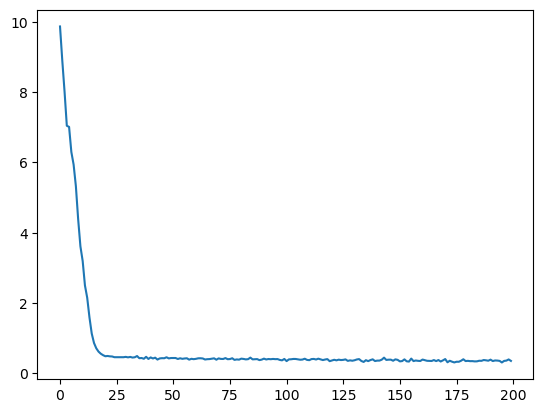

In [12]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.plot(losses)

In [19]:
true_label = np.array([1, 0, 1, 0, 1]) # 二分类
predicate_1 = np.array([0.8, 0.7, 0.8, 0.3, 0.8])

In [20]:
def test_lose(y, yhat):
    return -np.sum(y * np.log(yhat) + (1 - y) * np.log(1 - yhat))

In [21]:
test_lose(true_label, predicate_1)

2.2300784022072975